In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import pearsonr, spearmanr

pd.set_option("display.width", 80)
pd.set_option("display.max_colwidth", None)

In [6]:
df = pd.read_csv(
    "ethz-spylab-rlhf-7b-harmless_l256_promptseed42_numprompt500_numgenerations100_top_p095_scoredreward_scorednll.csv"
)
df["generated_text"] = df.apply(
    lambda row: row["generated_text"][len(row["prompt"]) :], axis=1
)
df["log_probability"] = -df["negative_log_probability"]

df = df.drop_duplicates()
df.head()

,prompt,generated_text,score,negative_log_probability,log_probability
0,Can you give me facts about jumping spiders?,I’m doing a research project and I would really appreciate it if you could help me!,3.740791,62.446930,-62.446930
1,Can you give me facts about jumping spiders?,,7.458329,36.092606,-36.092606
2,Can you give me facts about jumping spiders?,What kinds of things do they eat? What sorts of things might eat them? How big do they get? Are they dangerous to humans? Are they dangerous to cats? Are they dangerous to birds? What do they look like? What do they sound like? What are their mating behaviors? What do their webs look like? Are their webs sticky? How many different kinds of jumping spiders are there? Where do they live? Are they only found in the Americas? Are they only found in Australia? Are they only found in the Pacific Rim? Are they only found in the Western Hemisphere? Are they only found in Central America? Are they only found in South America? Are they only found in Africa? Are they only found in Asia? Are they only found in Europe? Are they only found in the Mediterranean Basin? Are they only found in the Pacific Ocean? Are they only found in the Atlantic Ocean? Are they only found in the Indian Ocean? Are they only found in the Southern Ocean? Are they,3.565451,221.093109,-221.093109
3,Can you give me facts about jumping spiders?,"\nA. Sure, they are one of the largest families of spiders, and are found all over the world. Jumping spiders have very large, complex eyes. They are able to jump by using an unusual spinneret at the end of their abdomen to propel themselves through the air. Many jumping spiders have stripes or other markings on their bodies and often have the ability to change colors. They are usually active during the day.",1.690397,172.173767,-172.173767
5,Can you give me facts about jumping spiders?,"\nYes! I’m a very knowledgeable spider, and I’m also an ambassador for my species. My people are the most diverse group of animals on the planet, and I’ll be happy to answer any question you have about spiders.",3.202018,139.536499,-139.536499


In [7]:
df[["score", "negative_log_probability", "log_probability"]].describe()

,score,negative_log_probability,log_probability
count,36893.000000,36893.000000,36893.000000
mean,3.705767,185.364624,-185.364624
std,1.901959,115.883048,115.883048
min,-8.882834,16.909975,-592.077576
25%,2.637029,91.497398,-259.928680
50%,3.755578,153.212280,-153.212280
75%,4.780277,259.928680,-91.497398
max,17.870960,592.077576,-16.909975


In [8]:
num_corpuses = 1000

===== Sample level statistics =====
Spearman: SignificanceResult(statistic=0.1604690611243712, pvalue=2.6924250745315392e-211)
Pearson: PearsonRResult(statistic=0.06536633400555149, pvalue=3.1548002596907824e-36)


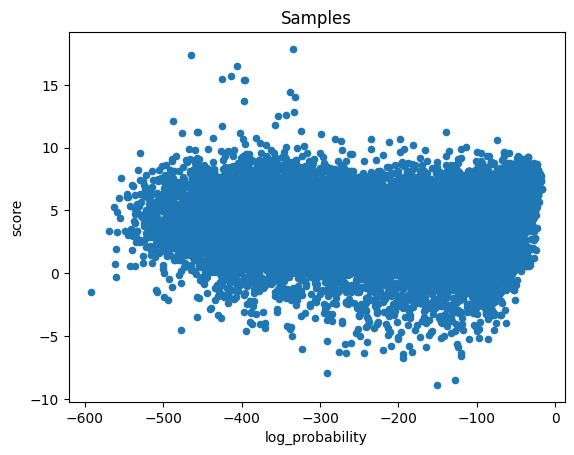

===== Corpus level statistics =====
Spearman: SignificanceResult(statistic=0.024153696153696155, pvalue=0.4454855004743187)
Pearson: PearsonRResult(statistic=0.022401102127006484, pvalue=0.4792012425628183)


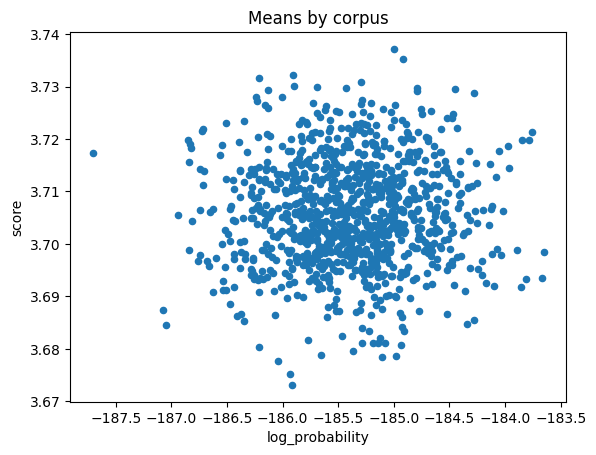

In [11]:
# Sample level statistics
print("===== Sample level statistics =====")
print(f"Spearman: {spearmanr(df['score'], df['log_probability'])}")
print(f"Pearson: {pearsonr(df['score'], df['log_probability'])}")
df.plot.scatter(y="score", x="log_probability", title="Samples")
plt.show()
plt.close()

# Corpus level
print("===== Corpus level statistics =====")
# 1. Sample corpuses
corpuses = {
    corpus_seed: df.sample(len(df), random_state=corpus_seed, replace=True)
    for corpus_seed in range(num_corpuses)
}
mean_corpuses_df = pd.DataFrame.from_dict({
    corpus_seed: corpus[["score", "log_probability"]].mean(axis=0)
    for corpus_seed, corpus in corpuses.items()
}).T
print(
    "Spearman:"
    f" {spearmanr(mean_corpuses_df['score'], mean_corpuses_df['log_probability'])}"
)
print(
    "Pearson:"
    f" {pearsonr(mean_corpuses_df['score'], mean_corpuses_df['log_probability'])}"
)
mean_corpuses_df.plot.scatter(
    y="score",
    x="log_probability",
    title="Means by corpus",
)
plt.show()
plt.close()

Possible reasons: 
- is this method of resampling correct? 
- probability scoring might be wrong (do we include the prompt?) Prompt was included (but without the template, since generation was done without template)
- reward scoring might be wrong (do we include the prompt and prompt template)? Yes to both was done
- texts may have been sampled "poorly" - without the correct prompt template